<a href="https://colab.research.google.com/github/KomalRai18/Image-Classification-CNN/blob/main/Copy_of_ProjectDIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:20<00:00, 95.3MB/s]
100% 1.06G/1.06G [00:20<00:00, 56.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import MaxPooling2D,Flatten,Dense,Convolution2D,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create CNN model and passing the data in it

model = Sequential()

model.add(Convolution2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Convolution2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Convolution2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=25, validation_data = validation_ds)

Epoch 1/25
625/625 [==============================] - 74s 102ms/step - loss: 1.4615 - accuracy: 0.5408 - val_loss: 0.7240 - val_accuracy: 0.5794
Epoch 2/25
625/625 [==============================] - 66s 104ms/step - loss: 0.6724 - accuracy: 0.5649 - val_loss: 0.6587 - val_accuracy: 0.5692
Epoch 3/25
625/625 [==============================] - 64s 102ms/step - loss: 0.6678 - accuracy: 0.5768 - val_loss: 0.6235 - val_accuracy: 0.6414
Epoch 4/25
625/625 [==============================] - 65s 103ms/step - loss: 0.6786 - accuracy: 0.5769 - val_loss: 0.6882 - val_accuracy: 0.5298
Epoch 5/25
625/625 [==============================] - 65s 104ms/step - loss: 0.6363 - accuracy: 0.6261 - val_loss: 0.6148 - val_accuracy: 0.6562
Epoch 6/25
625/625 [==============================] - 68s 108ms/step - loss: 0.5980 - accuracy: 0.6799 - val_loss: 0.6984 - val_accuracy: 0.5580
Epoch 7/25
625/625 [==============================] - 67s 107ms/step - loss: 0.5662 - accuracy: 0.7071 - val_loss: 0.5968 - val_ac

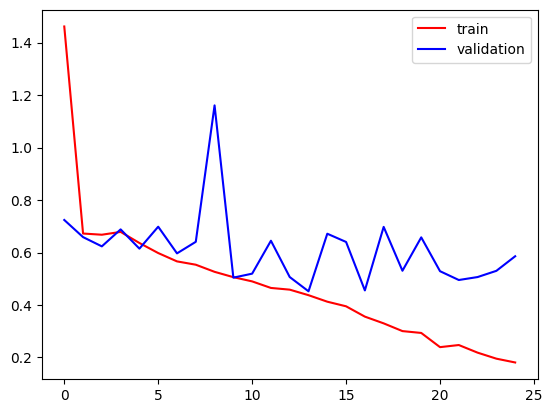

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

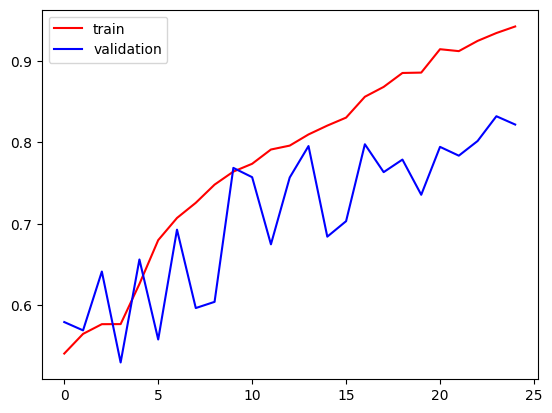

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

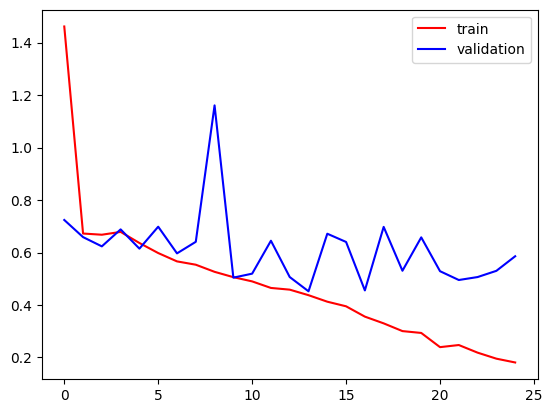

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

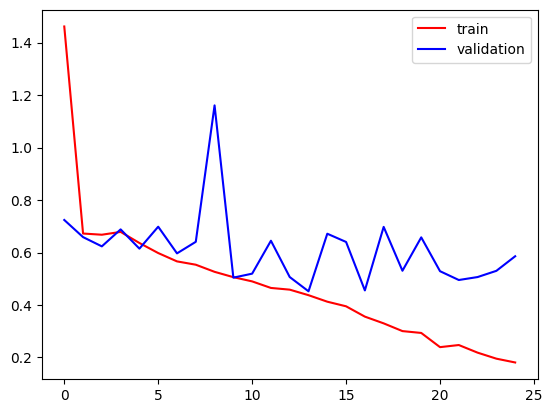

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10.jpg')

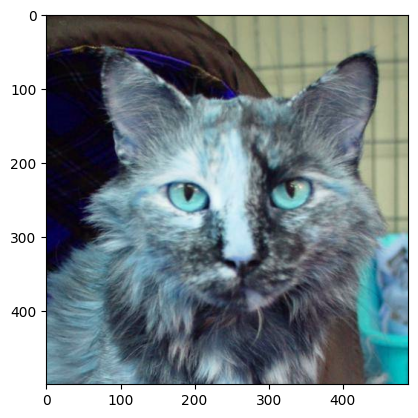

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(499, 489, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

array([[[ 40,  31,  27],
        [ 33,  24,  20],
        [ 24,  13,   9],
        ...,
        [158, 161, 129],
        [156, 159, 127],
        [154, 157, 125]],

       [[ 45,  36,  32],
        [ 50,  41,  37],
        [ 41,  30,  26],
        ...,
        [159, 162, 130],
        [156, 159, 127],
        [154, 157, 125]],

       [[ 46,  40,  33],
        [ 54,  48,  42],
        [ 53,  45,  38],
        ...,
        [160, 162, 130],
        [157, 160, 128],
        [155, 158, 126]],

       ...,

       [[120, 165, 178],
        [116, 161, 174],
        [111, 155, 168],
        ...,
        [ 10, 183, 186],
        [ 11, 169, 175],
        [ 13, 160, 167]],

       [[112, 152, 166],
        [105, 147, 160],
        [ 96, 140, 153],
        ...,
        [  7, 183, 186],
        [  7, 170, 176],
        [  6, 161, 167]],

       [[107, 143, 156],
        [ 98, 135, 150],
        [ 93, 135, 148],
        ...,
        [  5, 183, 186],
        [  3, 173, 177],
        [  1, 164, 169]]], dtype=uint8)
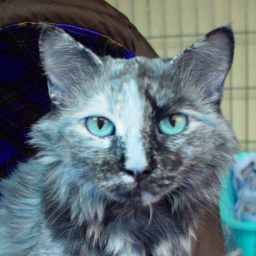

In [ ]:
test_img

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
def prediction(input_test):
  arr = model.predict(input_test)
  eval = arr[0,0]
  if(eval==1):
    pred =  "Cat"
  else:
    pred =  "Dog"

  return pred

In [ ]:
prediction(test_input)

1/1 [==============================] - 0s 17ms/step


'Cat'

In [ ]:
test_img2 = cv2.imread('/content/test/dogs/dog.100.jpg')

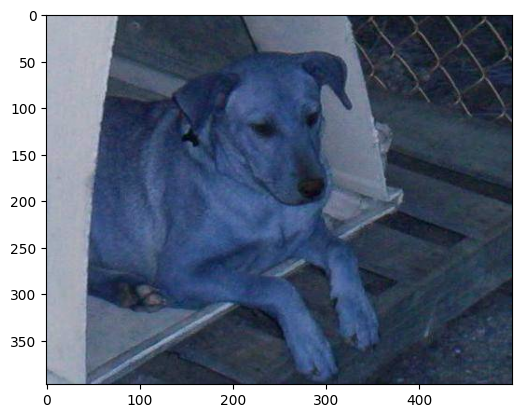

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(397, 500, 3)

In [ ]:
test_img2 = cv2.resize(test_img2, (256,256))

array([[[179, 185, 196],
        [179, 185, 196],
        [178, 184, 195],
        ...,
        [ 15,  33,  47],
        [ 17,  28,  39],
        [ 19,  29,  39]],

       [[175, 181, 192],
        [177, 182, 193],
        [177, 183, 194],
        ...,
        [ 23,  37,  53],
        [ 25,  34,  47],
        [ 23,  31,  44]],

       [[175, 181, 192],
        [178, 184, 195],
        [179, 185, 196],
        ...,
        [ 22,  33,  51],
        [ 25,  31,  47],
        [ 19,  24,  40]],

       ...,

       [[148, 161, 178],
        [150, 163, 180],
        [149, 162, 180],
        ...,
        [ 56,  62,  83],
        [ 48,  59,  77],
        [ 48,  60,  78]],

       [[153, 164, 178],
        [154, 166, 180],
        [153, 166, 181],
        ...,
        [ 54,  60,  82],
        [ 55,  66,  84],
        [ 55,  67,  85]],

       [[157, 166, 179],
        [157, 168, 182],
        [154, 167, 183],
        ...,
        [ 53,  56,  81],
        [ 55,  66,  85],
        [ 54,  66,  84]]], dtype=uint8)
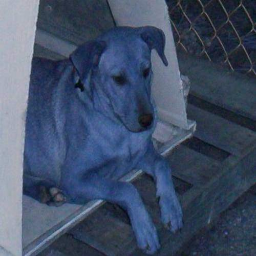

In [ ]:
test_img2

In [ ]:
test_input2 = test_img2.reshape((1,256,256,3))

In [ ]:
prediction(test_input2)

1/1 [==============================] - 0s 17ms/step


'Dog'

1/1 [==============================] - 0s 263ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
new_img = cv2.imread("/content/test/cats/cat.10000.jpg")

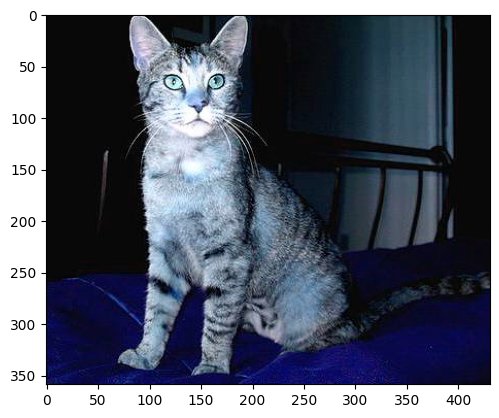

In [ ]:
plt.imshow(new_img)

In [ ]:
new_img.shape

(359, 431, 3)

In [ ]:
test_img = cv2.resize(new_img, (256,256))

In [ ]:
new_input = test_img.reshape((1,256,256,3))

In [ ]:
prediction(new_input)

1/1 [==============================] - 0s 18ms/step


'Cat'